<a href="https://www.kaggle.com/code/akshayr009/maleria-detection?scriptVersionId=102016286" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread


In [2]:
# Define path to the data directory
data_dir = Path('../input/cell-images-for-detecting-malaria/')

# Path to train directory (Fancy pathlib...no more os.path!!)
train_dir = data_dir / 'cell_images'


*  Uninfected: These are the samples that describe the normal (maleria) case.
*  Parasitized: This directory contains those samples that are the maleria cases.

In [3]:
# Get the path to the normal and maleria sub-directories
normal_cases_dir = train_dir / 'Uninfected'
maleria_cases_dir = train_dir / 'Parasitized'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.png')
maleria_cases = maleria_cases_dir.glob('*.png')

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the maleria_cases cases. The label for these cases will be 1
for img in maleria_cases:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,../input/cell-images-for-detecting-malaria/cel...,1
1,../input/cell-images-for-detecting-malaria/cel...,1
2,../input/cell-images-for-detecting-malaria/cel...,0
3,../input/cell-images-for-detecting-malaria/cel...,0
4,../input/cell-images-for-detecting-malaria/cel...,0


In [4]:
train_data.shape

(27558, 2)

1    13779
0    13779
Name: label, dtype: int64


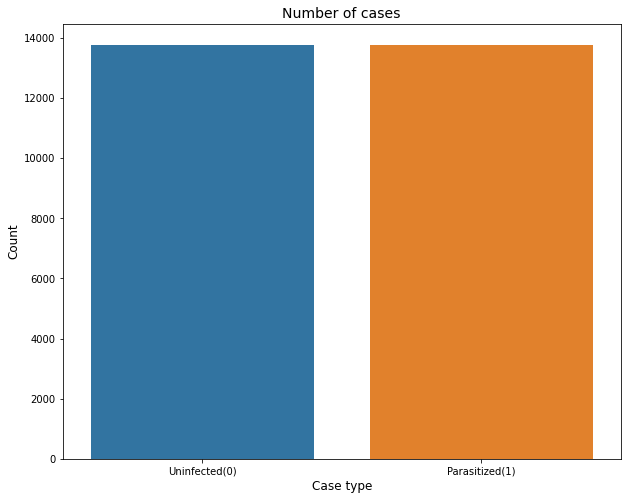

In [5]:
# Get the counts for each class
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Uninfected(0)', 'Parasitized(1)'])
plt.show()

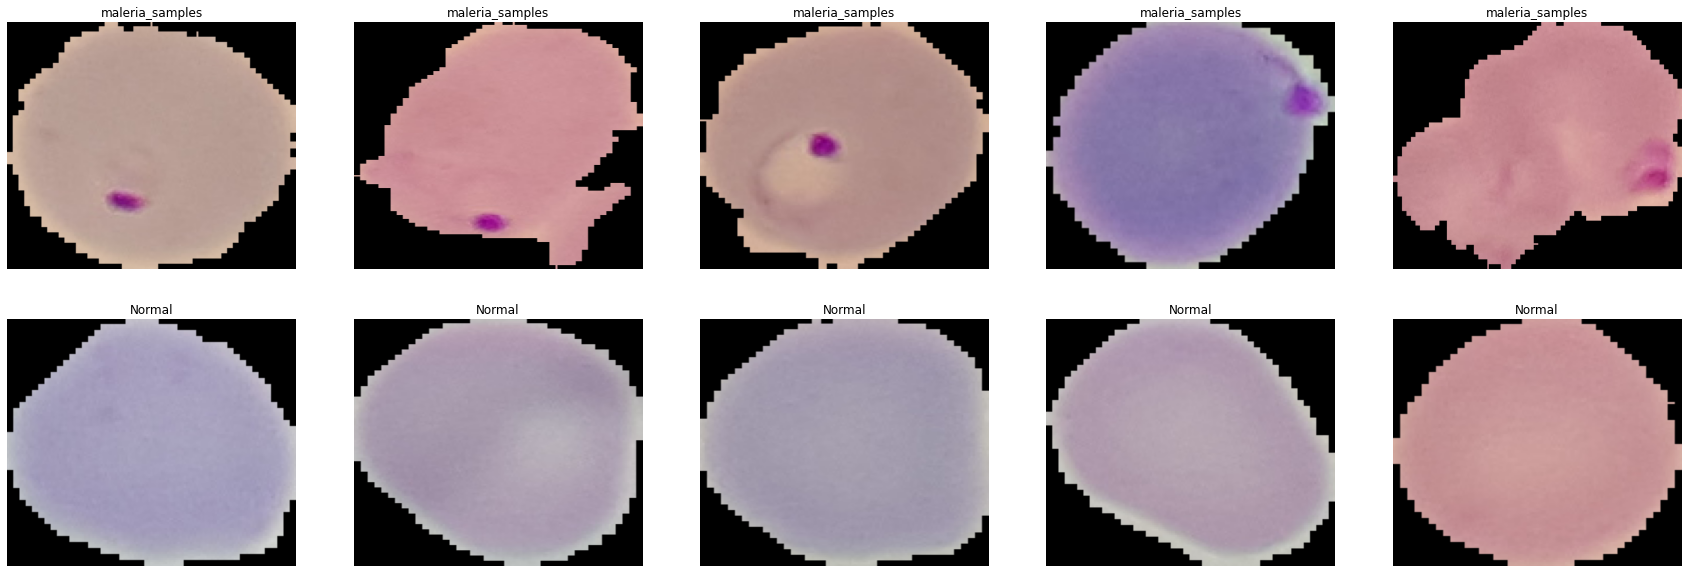

In [6]:
# Get few samples for both the classes
maleria_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list 
samples = maleria_samples + normal_samples
del maleria_samples, normal_samples

# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("maleria_samples")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

# loading train image using cv2

In [7]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'Uninfected'
maleria_cases_dir = train_dir / 'Parasitized'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.png')
maleria_cases = maleria_cases_dir.glob('*.png')
train_data = []
train_labels = []
from tqdm import tqdm

for img in tqdm(normal_cases):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'normal'
    train_data.append(img)
    train_labels.append(label)
                      
# maleria_cases         
for img in tqdm(maleria_cases):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'maleria'
    train_data.append(img)
    train_labels.append(label)
    
# Convert the list into numpy arrays

train_data1 = np.array(train_data)
train_labels1 = np.array(train_labels)

print("Total number of validation examples: ", train_data1.shape)
print("Total number of labels:", train_labels1.shape)

13779it [01:39, 138.37it/s]
13779it [01:38, 140.22it/s]


Total number of validation examples:  (27558, 28, 28, 3)
Total number of labels: (27558,)


In [8]:
train_data1.shape

(27558, 28, 28, 3)

In [9]:
train_data1[1]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

# Train output file convert list to csv file 

In [10]:
train_labels1 = pd.DataFrame(train_labels1, columns=[ 'label'],index=None)
train_labels1.head()

,label
0,normal
1,normal
2,normal
3,normal
4,normal


In [11]:
train_labels1['label']=train_labels1['label'].map({'normal':0,'maleria':1,
                                                   
                                                  })

In [12]:
train_labels1

,label
0,0
1,0
2,0
3,0
4,0
...,...
27553,1
27554,1
27555,1
27556,1


In [13]:
print(train_data1.shape)
print(train_labels1.shape)


(27558, 28, 28, 3)
(27558, 1)


0    13779
1    13779
Name: label, dtype: int64


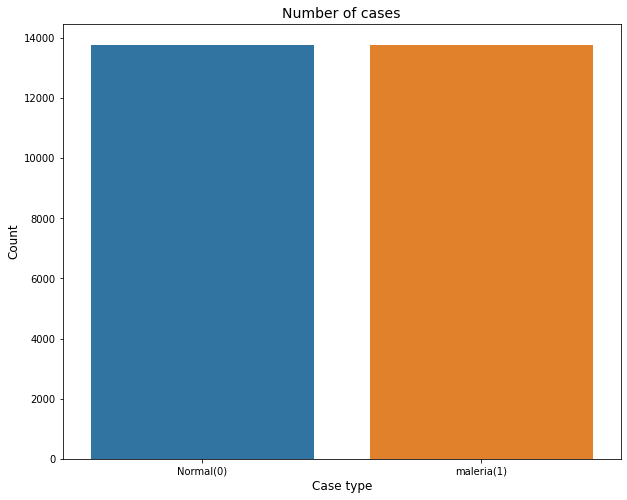

In [14]:
cases_count1 = train_labels1['label'].value_counts()
print(cases_count1)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count1.index, y= cases_count1.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'maleria(1)'])
plt.show()

In [15]:
train_data1.shape

(27558, 28, 28, 3)

In [16]:
train_data2 =train_data1.reshape(-1,28,28,3)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels1, test_size=0.23, random_state=42)

# **Augmentation
Data augmentation is a powerful technique which helps in almost every case for improving the robustness of a model. But augmentation can be much more helpful where the dataset is imbalanced. You can generate different samples of undersampled class in order to try to balance the overall distribution.

In [18]:

from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(28,
                                  28,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

2022-07-29 05:44:14.701878: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-29 05:44:14.827156: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-29 05:44:14.827950: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-29 05:44:14.829743: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

# Create the model

In [19]:
import tensorflow as tf
from tensorflow.keras import  layers, models

model = models.Sequential([
    data_augmentation,
    layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)) ,
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
    
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 28)        784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 53,904
Trainable params: 53,904
Non-trainable params: 0
__________________________________________________

In [20]:
model.add(layers.Flatten())
model.add(layers.Dense(640, activation='tanh'))
#model.add(Dropout(0.25))

model.add(layers.Dense(444, activation='tanh'))
#model.add(Dropout(0.25))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(2,activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 28)        784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)              

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(np.array(X_train), np.array(y_train), epochs=100, validation_data=(np.array(X_test), np.array(y_test)))
#model.fit(np.array(train_data1), np.array(train_labels1), epochs=10)

2022-07-29 05:44:19.722150: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


/opt/conda/lib/python3.7/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '
2022-07-29 05:44:21.418895: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


664/664 [==============================] - 12s 6ms/step - loss: 0.5037 - accuracy: 0.7350 - val_loss: 0.2434 - val_accuracy: 0.9180
Epoch 2/100
664/664 [==============================] - 4s 5ms/step - loss: 0.2274 - accuracy: 0.9206 - val_loss: 0.1921 - val_accuracy: 0.9262
Epoch 3/100
664/664 [==============================] - 4s 6ms/step - loss: 0.1956 - accuracy: 0.9332 - val_loss: 0.1802 - val_accuracy: 0.9342
Epoch 4/100
664/664 [==============================] - 4s 5ms/step - loss: 0.1845 - accuracy: 0.9389 - val_loss: 0.2051 - val_accuracy: 0.9235
Epoch 5/100
664/664 [==============================] - 4s 6ms/step - loss: 0.1805 - accuracy: 0.9388 - val_loss: 0.1877 - val_accuracy: 0.9399
Epoch 6/100
664/664 [==============================] - 4s 6ms/step - loss: 0.1725 - accuracy: 0.9432 - val_loss: 0.1599 - val_accuracy: 0.9487
Epoch 7/100
664/664 [==============================] - 4s 5ms/step - loss: 0.1709 - accuracy: 0.9431 - val_loss: 0.1545 - val_accuracy: 0.9481
Epoch 8/10

# Testing the a image with sample data

In [22]:
pic=[]
img = cv2.imread(str('../input/cell-images-for-detecting-malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png'))
img = cv2.resize(img, (28,28))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=np.array(img)
img = img/255
#label = to_categorical(0, num_classes=2)
pic.append(img)
#pic_labels.append(pneu)


In [23]:
pic1 = np.array(pic)

In [24]:
a=model.predict(pic1)
a

array([[0.99278027, 0.24036404]], dtype=float32)

In [25]:
a.argmax()

0

In [26]:
#!mkdir -p saved_model
model.save('maleria_model')

2022-07-29 05:51:50.418035: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [27]:
new_model = tf.keras.models.load_model('maleria_model')

# Check its architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 28)        784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)              

In [28]:
a=new_model.predict(pic1)
a

array([[0.99278027, 0.24036404]], dtype=float32)

In [29]:
np.argmax(a)

0

In [30]:
image='../input/cell-images-for-detecting-malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png'
img = cv2.imread(str(image))
# Importing Image module from PIL package 
from PIL import Image 
import PIL 
  
# creating a image object (main image) 
im1 = Image.open(image) 
  
# save a image using extension
im1 = im1.save("no_maleria.jpg")